In [2]:
import json
import pickle

import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from tqdm import tqdm

# import dataholders as dh
import utils
import points_processing as pp

In [3]:
with open('data/data16.pickle', 'rb') as f:
    data = pickle.load(f)

In [53]:
def synchronize(time_actos: np.ndarray, time_uft: np.ndarray, *arrays, how='linear') -> (np.ndarray, np.ndarray):
    """
    Synchronizes the UFT time and record vector to conform with the ACTOS timestamps.
    """
    
    narrays = [[] for array in arrays]
    
    for t in tqdm(time_uft):
        try:
            index = np.where(time_uft == t - 5)[0][0]
        except IndexError:
            continue
            
        for i, array in enumerate(arrays):
            narrays[i].append((array[index] + array[index + 1])/2)
        
    narrays = list(map(np.array, narrays))
    
    return time_uft, narrays

In [81]:
def synchronize(time_actos: np.ndarray, time_uft: np.ndarray, *arrays, how='linear') -> (np.ndarray, np.ndarray):
    """
    Synchronizes the UFT time and record vector to conform with the ACTOS timestamps. Should work always, but super slowly.
    """
    
    narrays = [np.zeros_like(array) for array in arrays]
    
    for index_t, t in tqdm(enumerate(time_uft), total=time_uft.shape[0]):
        try:
            index = np.where(time_uft == t - 5)[0][0]
        except IndexError:
            continue
            
        for i, array in enumerate(arrays):
            narrays[i][index_t] = (array[index] + array[index + 1])/2
        
    narrays = list(map(np.array, narrays))
    
    return time_uft, narrays

In [82]:
def fast_synchronize(time_actos: np.ndarray, time_uft: np.ndarray, *arrays, cut=False) -> (np.ndarray, np.ndarray):
    """
    Synchronizes the UFT time and record vector to conform with the ACTOS timestamps, and hopefully does so quickly.
    """
    
    time_uft = utils.rolling_window(time_uft, 2).mean(1, dtype=int)
    narrays = [utils.rolling_window(array, 2).mean(1) for array in arrays]
    
    return time_uft, narrays

In [79]:
time, lowT, upT = data['time_av'], data['lowT_av'], data['upT_av']

In [71]:
time, [lowT, upT] = fast_synchronize(data['time'], data['time_av'], data['lowT_av'], data['upT_av'])

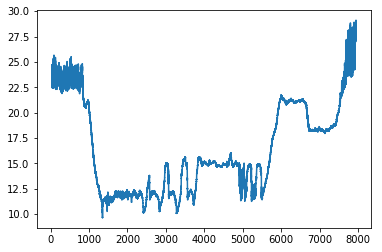

In [85]:
plt.plot(time/1000, lowT)